## Scratch of the Single Layer NN (GD)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Simulate data
np.random.seed(0)
n = 200
X = np.linspace(-3, 3, n).reshape(-1, 1)
y_true = np.sin(X) + 0.1 * np.random.randn(n, 1)

In [3]:
# 2. Model settings
n_input = X.shape[1]
n_hidden = 5
n_output = 1
learning_rate = 0.05
epochs = 1000

In [4]:
# 3. Initialize weights
W1 = np.random.randn(n_input, n_hidden) * 0.1
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.1
b2 = np.zeros((1, n_output))

In [5]:
# 4. Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

In [6]:
# 5. Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    y_pred = Z2

    # MSE loss
    loss = np.mean((y_true - y_pred)**2)
    losses.append(loss)

    # Backpropagation
    dZ2 = 2 * (y_pred - y_true) / n
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * sigmoid_deriv(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Gradient descent update
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.5533
Epoch 100, Loss: 0.2605
Epoch 200, Loss: 0.1404
Epoch 300, Loss: 0.1268
Epoch 400, Loss: 0.1155
Epoch 500, Loss: 0.1061
Epoch 600, Loss: 0.0982
Epoch 700, Loss: 0.0916
Epoch 800, Loss: 0.0859
Epoch 900, Loss: 0.0808


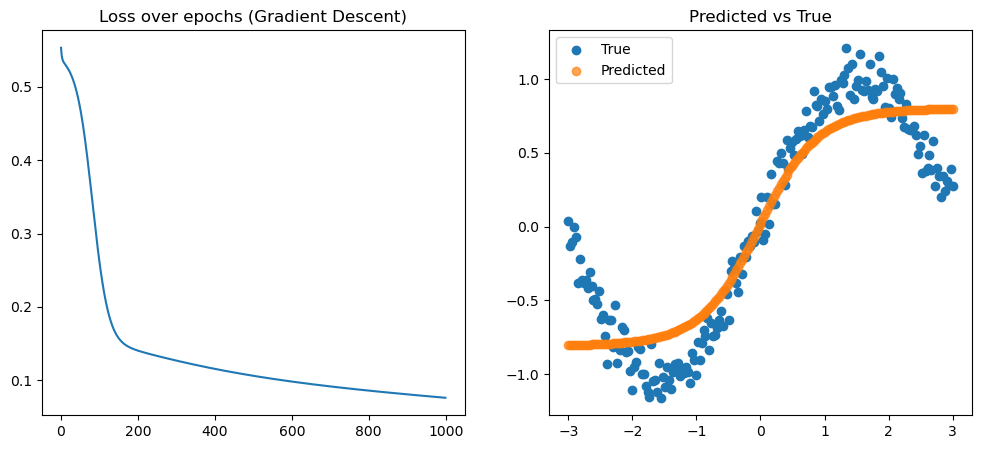

In [7]:
# 6. Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over epochs (Gradient Descent)")

plt.subplot(1, 2, 2)
plt.scatter(X, y_true, label='True')
plt.scatter(X, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Predicted vs True")
plt.show()

## Play Around with SGD (Keras Version)

In [5]:
!pip install tensorflow

# Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

Defaulting to user installation because normal site-packages is not writeable
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 44.2 MB/s eta 0:00:0000:0100:01
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

2025-05-07 17:18:48.380522: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-07 17:18:48.600282: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-07 17:18:48.783644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746663528.937361 3923539 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746663528.978827 3923539 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746663529.371055 3923539 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [9]:
# 1. Simulate data
np.random.seed(0)
n = 200
X = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(n, 1)

In [10]:
# 2. Build the model
model = keras.Sequential([
    keras.Input(shape=(1,)),                
    layers.Dense(units=5, activation='sigmoid'),
    layers.Dense(units=1)
])

2025-05-06 15:27:30.874657: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [11]:
# 3. Compile using Stochastic Gradient Descent
sgd_optimizer = keras.optimizers.SGD(
    learning_rate=0.2, nesterov=False  
)

model.compile(
    optimizer=sgd_optimizer,
    loss='mse'
)

In [12]:
# 4. Fit the model
history = model.fit(X, y, epochs=1000, batch_size=32, verbose=0) 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


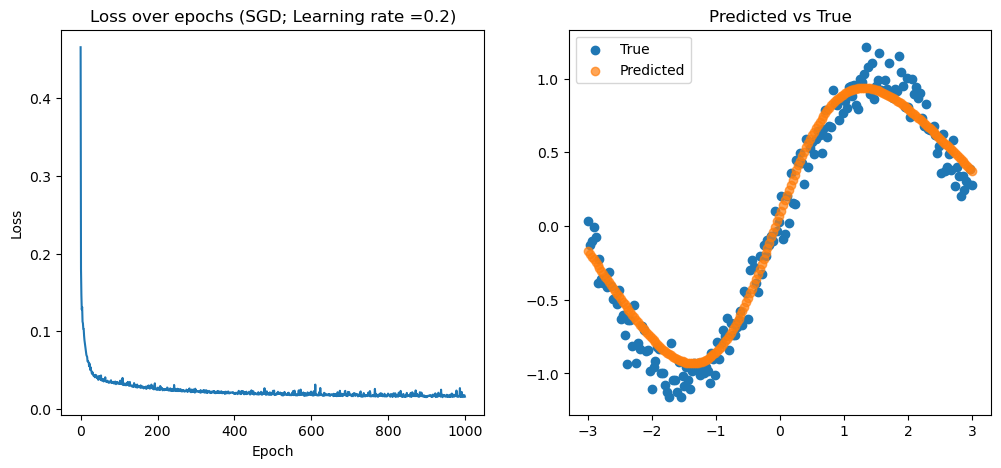

In [13]:
# 5. Predict and plot
y_pred = model.predict(X)

plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title("Loss over epochs (SGD; Learning rate =0.2)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Prediction vs ground truth
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='True')
plt.scatter(X, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Predicted vs True")

plt.show()

## Compared to the gradient descent method, the predicted values are closer to the true values 
## when using stochastic gradient descent.

## Play Around with Different Learning Rates

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


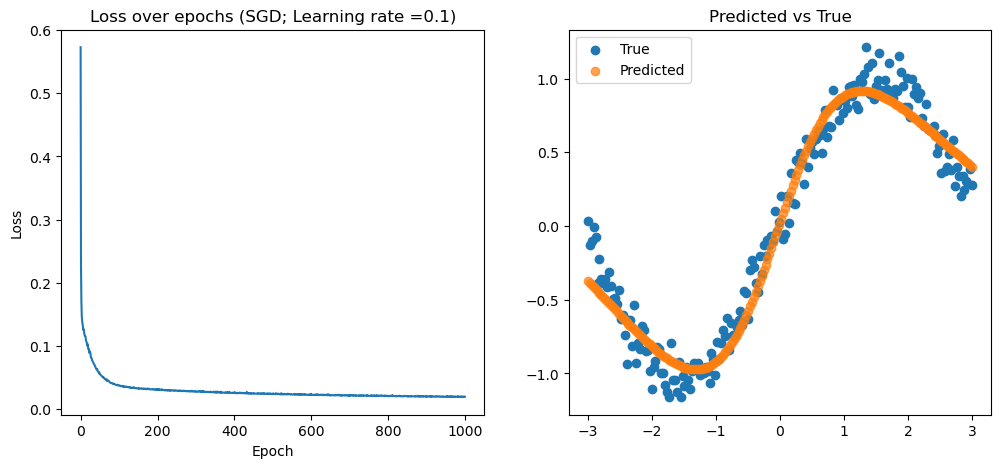

In [14]:
## Learning rate = 0.1

# 1. Build a new model
model_lr2 = keras.Sequential([
    keras.Input(shape=(1,)),                
    layers.Dense(units=5, activation='sigmoid'),
    layers.Dense(units=1)
])

# 2. Compile with learning rate = 0.1
sgd_optimizer_lr2 = keras.optimizers.SGD(
    learning_rate=0.1, nesterov=False  
)

model_lr2.compile(
    optimizer=sgd_optimizer_lr2,
    loss='mse'
)

# 3. Fit the model
history_lr2 = model_lr2.fit(X, y, epochs=1000, batch_size=32, verbose=0) 

# 4. Predict and plot
y_pred_lr2 = model_lr2.predict(X)

plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history_lr2.history['loss'])
plt.title("Loss over epochs (SGD; Learning rate =0.1)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Prediction vs ground truth
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='True')
plt.scatter(X, y_pred_lr2, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Predicted vs True")

plt.show()

## As the plot shows, when we set a lower learning rate (0.1), 
## the optimization process becomes more stable and less shaking.

## Play Around with Different Activation Functions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


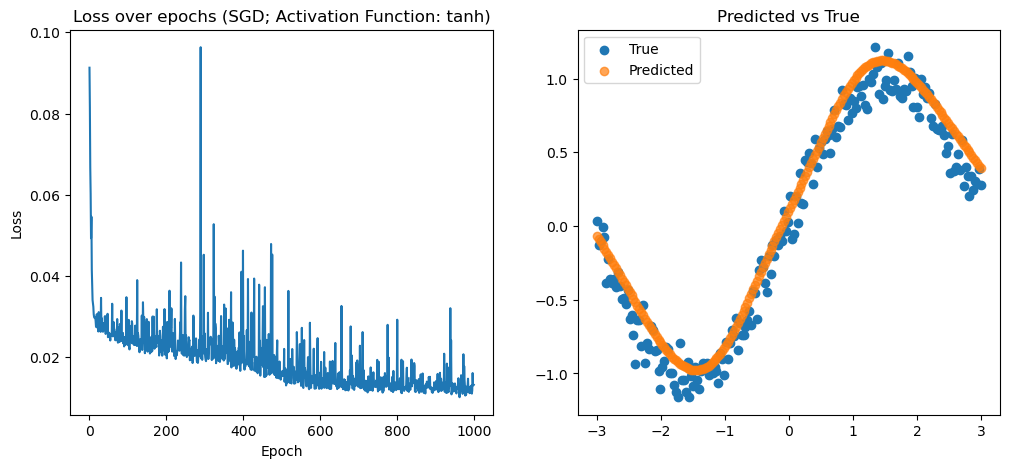

In [15]:
## Activation Function: tanh

# 1. Build a new model
model_lr3 = keras.Sequential([
    keras.Input(shape=(1,)),                
    layers.Dense(units=5, activation='tanh'),
    layers.Dense(units=1)
])

# 2. Still compile with learning rate = 0.1
sgd_optimizer_lr3 = keras.optimizers.SGD(
    learning_rate=0.1, nesterov=False  
)

model_lr3.compile(
    optimizer=sgd_optimizer_lr3,
    loss='mse'
)

# 3. Fit the model
history_lr3 = model_lr3.fit(X, y, epochs=1000, batch_size=32, verbose=0) 

# 4. Predict and plot
y_pred_lr3 = model_lr3.predict(X)

plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history_lr3.history['loss'])
plt.title("Loss over epochs (SGD; Activation Function: tanh)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Prediction vs ground truth
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='True')
plt.scatter(X, y_pred_lr3, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Predicted vs True")

plt.show()

## When using tanh as the activation function, the model still fits well with the true values,
## while the optimization process tends to shake more compared to sigmoid.
## Therefore, we decided to use sigmoid.

## Play around with the L2 regularization

In [16]:
from keras import regularizers

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


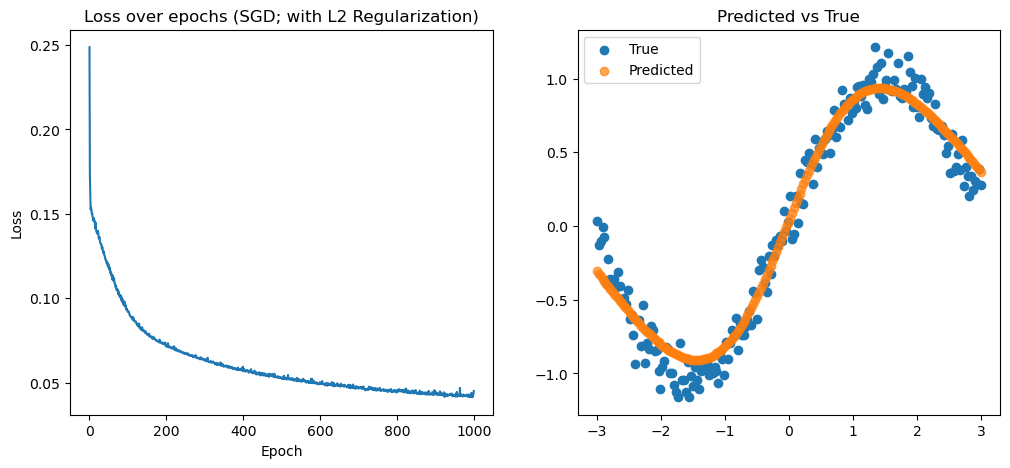

In [17]:
# 1. Build a new model with L2 regularization
model_lr4 = keras.Sequential([
    keras.Input(shape=(1,)),                
    layers.Dense(units=5, activation='sigmoid', 
                 kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization with lambda = 0.01
    layers.Dense(units=1)
])

# 2. Still compile with learning rate = 0.1
sgd_optimizer_lr4 = keras.optimizers.SGD(
    learning_rate=0.1, nesterov=False  
)

model_lr4.compile(
    optimizer=sgd_optimizer_lr4,
    loss='mse'
)

# 3. Fit the model
history_lr4 = model_lr4.fit(X, y, epochs=1000, batch_size=32, verbose=0) 

# 4. Predict and plot
y_pred_lr4 = model_lr4.predict(X)

plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history_lr4.history['loss'])
plt.title("Loss over epochs (SGD; with L2 Regularization)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Prediction vs ground truth
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='True')
plt.scatter(X, y_pred_lr4, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Predicted vs True")

plt.show()

## The loss function converges quickly. 
## The model fits the predicted values quite well with less overfitting, 
## suggesting it could generalize effectively to real data.

## Try It with Real Data (Bike Sharing): 

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Orignial dataset
# Load the CSV file
df = pd.read_csv('hour.csv')

# Display the first few rows
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


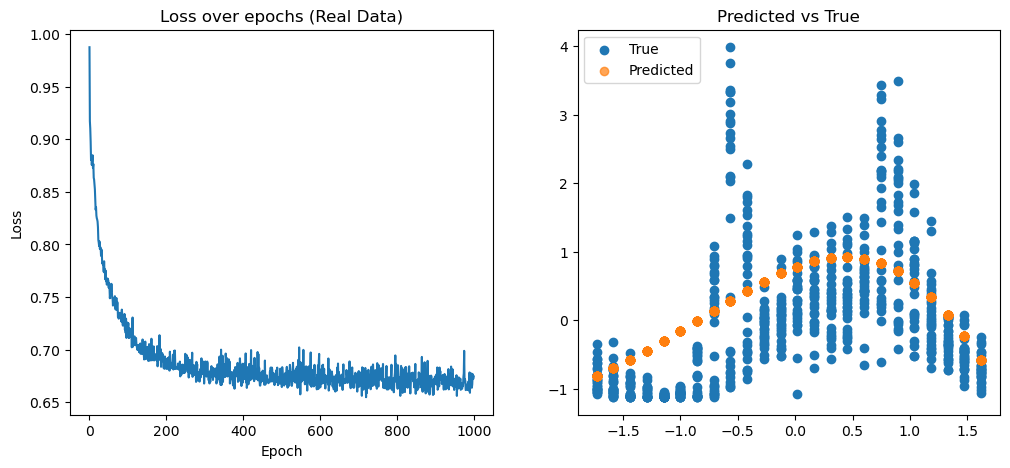

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Orignial dataset
# Load the CSV file
df = pd.read_csv('hour.csv')

# Display the first few rows
df.head()

# 1. Define X and y
df_subset = df[(df['instant'] >= 1) & (df['instant'] <= 688)]  # Use the data for January

hr = df_subset['hr']
cnt = df_subset['cnt']

scaler = StandardScaler()
X = scaler.fit_transform(hr.values.reshape(-1, 1))
y = scaler.fit_transform(cnt.values.reshape(-1, 1)) # Normalize the data

# 2. Use the model with L2 regularization
model_lr5 = keras.Sequential([
    keras.Input(shape=(1,)),                
    layers.Dense(units=5, activation='sigmoid', 
                 kernel_regularizer=regularizers.l2(0.01)), 
    layers.Dense(units=1)
])

# 3. Compile the model
sgd_optimizer_lr5 = keras.optimizers.SGD(
    learning_rate=0.1, nesterov=False  
)

model_lr5.compile(
    optimizer=sgd_optimizer_lr5,
    loss='mse'
)

# 4. Fit the model
history_lr5 = model_lr5.fit(X, y, epochs=1000, batch_size=32, verbose=0) 

# 5. Predict and plot
y_pred_lr5 = model_lr5.predict(X)

plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history_lr5.history['loss'])
plt.title("Loss over epochs (Real Data; LR = 0.1)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Prediction vs ground truth
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='True')
plt.scatter(X, y_pred_lr5, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Predicted vs True")

plt.show()

## Our neural network fits the true data quite well, though the optimization process shakes a little bit.
## So we want to decrease the learning rate.

## Decrease the learning rate to 0.01

# 1. Use the model with L2 regularization
model_lr6 = keras.Sequential([
    keras.Input(shape=(1,)),                
    layers.Dense(units=5, activation='sigmoid', 
                 kernel_regularizer=regularizers.l2(0.01)), 
    layers.Dense(units=1)
])

# 2. Compile the model
sgd_optimizer_lr6 = keras.optimizers.SGD(
    learning_rate=0.01, nesterov=False   # use 0.01 as the learning rate
)

model_lr6.compile(
    optimizer=sgd_optimizer_lr6,
    loss='mse'
)

# 3. Fit the model
history_lr6 = model_lr6.fit(X, y, epochs=1000, batch_size=32, verbose=0) 

# 4. Predict and plot
y_pred_lr6 = model_lr6.predict(X)

plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history_lr6.history['loss'])
plt.title("Loss over epochs (Real Data; LR = 0.01)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Prediction vs ground truth
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='True')
plt.scatter(X, y_pred_lr6, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Predicted vs True")

plt.show()

## As the plot shows, the optimization process becomes more stable and exhibits less fluctuation.

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


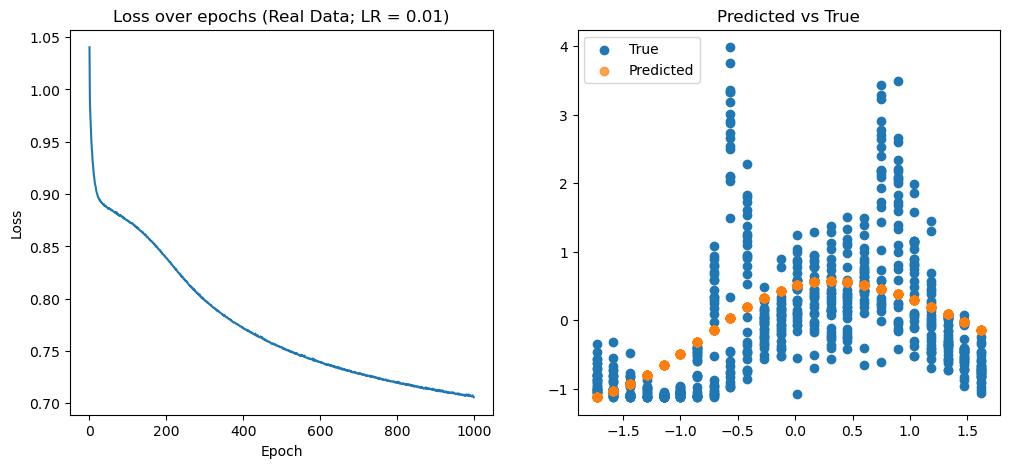

In [25]:
## Decrease the learning rate to 0.01

# 1. Use the model with L2 regularization
model_lr6 = keras.Sequential([
    keras.Input(shape=(1,)),                
    layers.Dense(units=5, activation='sigmoid', 
                 kernel_regularizer=regularizers.l2(0.01)), 
    layers.Dense(units=1)
])

# 2. Compile the model
sgd_optimizer_lr6 = keras.optimizers.SGD(
    learning_rate=0.01, nesterov=False   # use 0.01 as the learning rate
)

model_lr6.compile(
    optimizer=sgd_optimizer_lr6,
    loss='mse'
)

# 3. Fit the model
history_lr6 = model_lr6.fit(X, y, epochs=1000, batch_size=32, verbose=0) 

# 4. Predict and plot
y_pred_lr6 = model_lr6.predict(X)

plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history_lr6.history['loss'])
plt.title("Loss over epochs (Real Data; LR = 0.01)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Prediction vs ground truth
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='True')
plt.scatter(X, y_pred_lr6, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Predicted vs True")

plt.show()

## As the plot shows, the optimization process becomes more stable and exhibits less fluctuation.

Dataset shape: (17379, 17)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

F

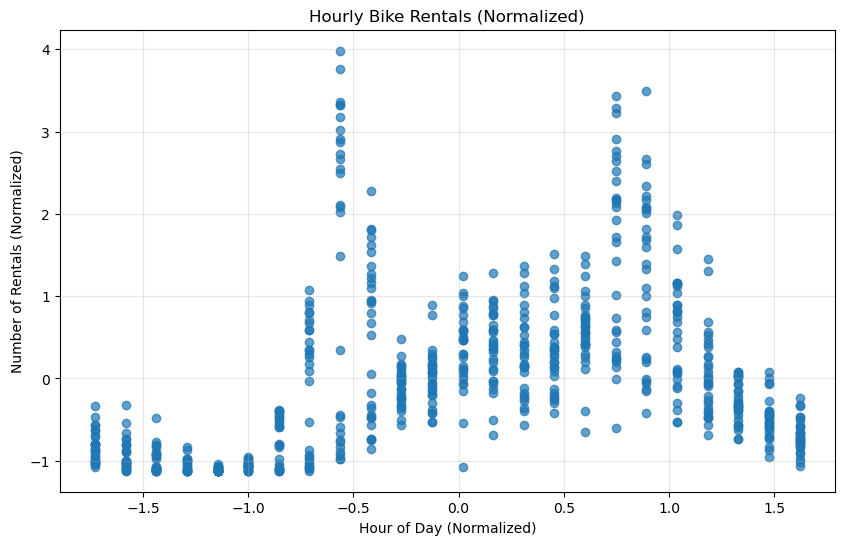



1. COMPARING DIFFERENT TYPES OF GRADIENT DESCENT


2025-05-07 17:18:54.535200: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


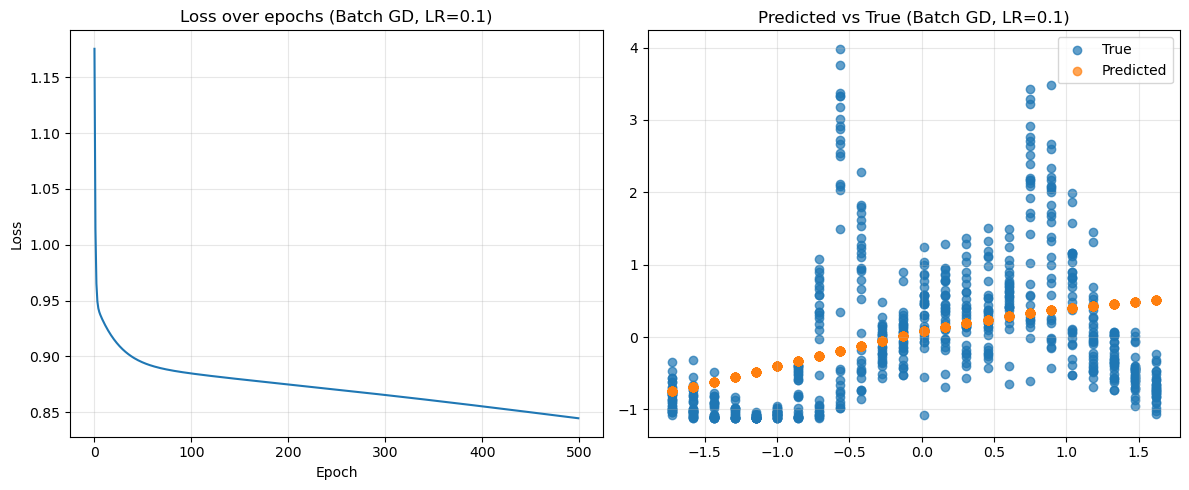

Final loss (Batch GD): 0.844711
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


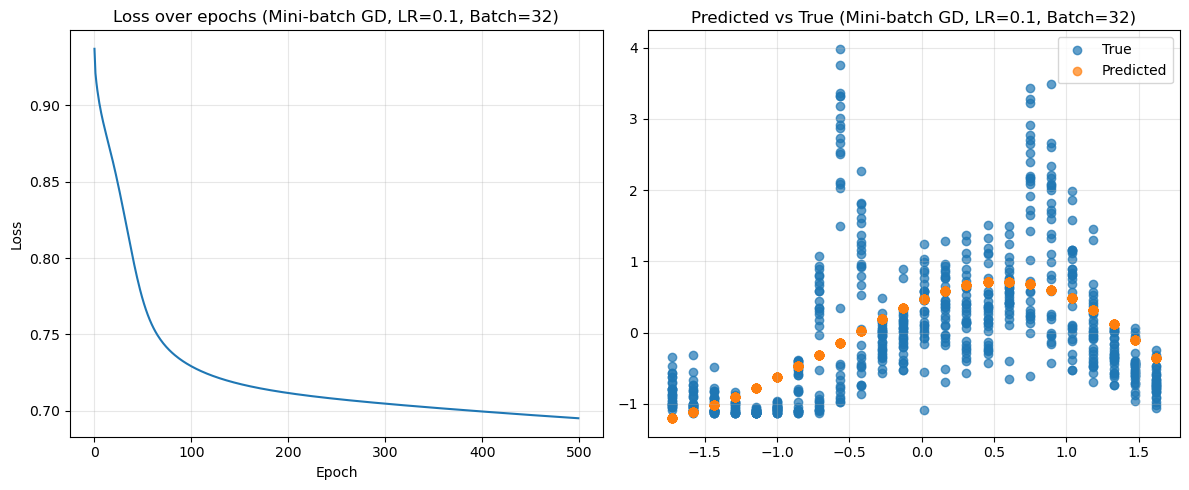

Final loss (Mini-batch GD): 0.694933
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


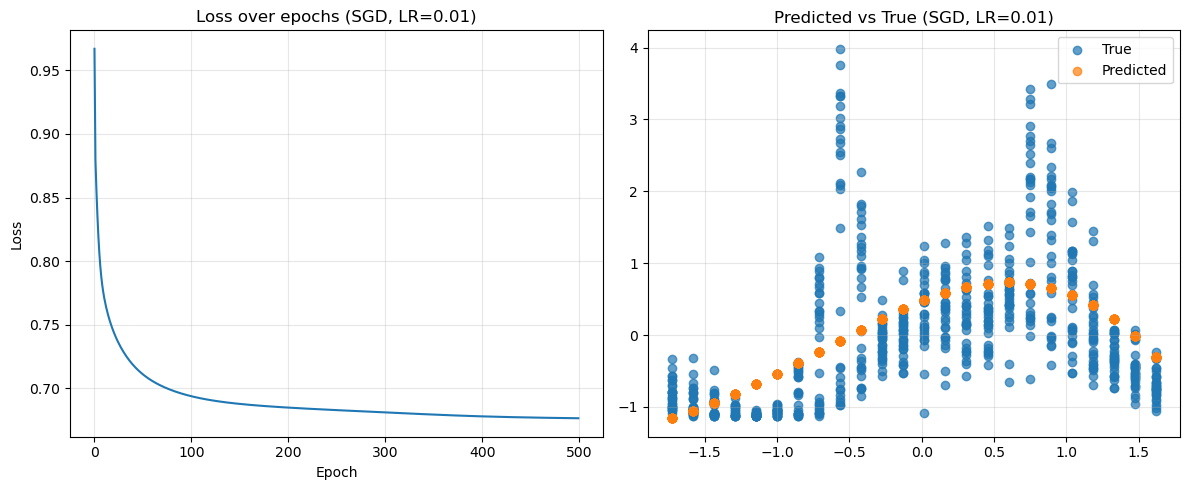

Final loss (SGD): 0.676415


2. COMPARING DIFFERENT LEARNING RATES

Training with learning rate: 0.001
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


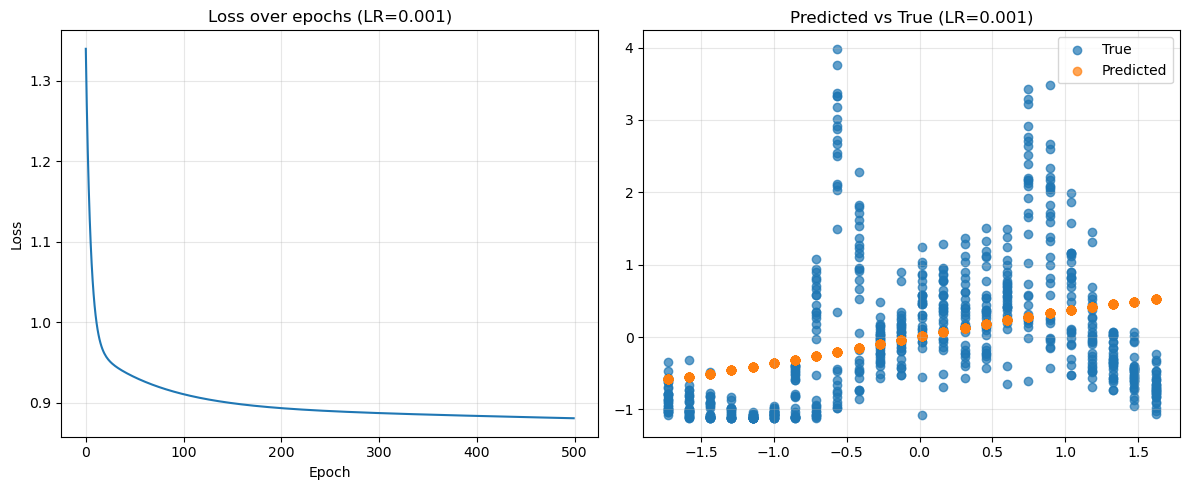

Final loss (LR=0.001): 0.881042

Training with learning rate: 0.01
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


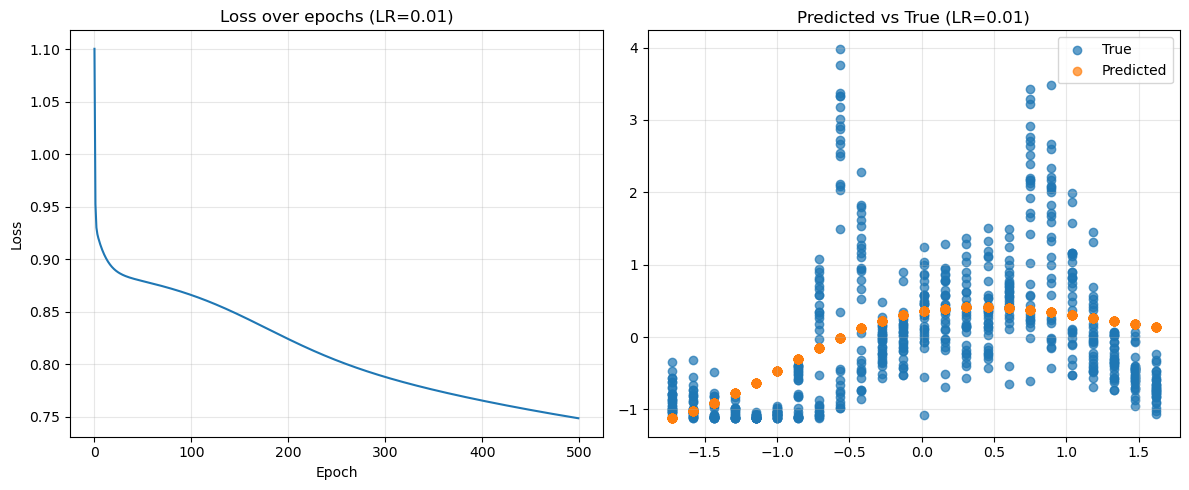

Final loss (LR=0.01): 0.748583

Training with learning rate: 0.1
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


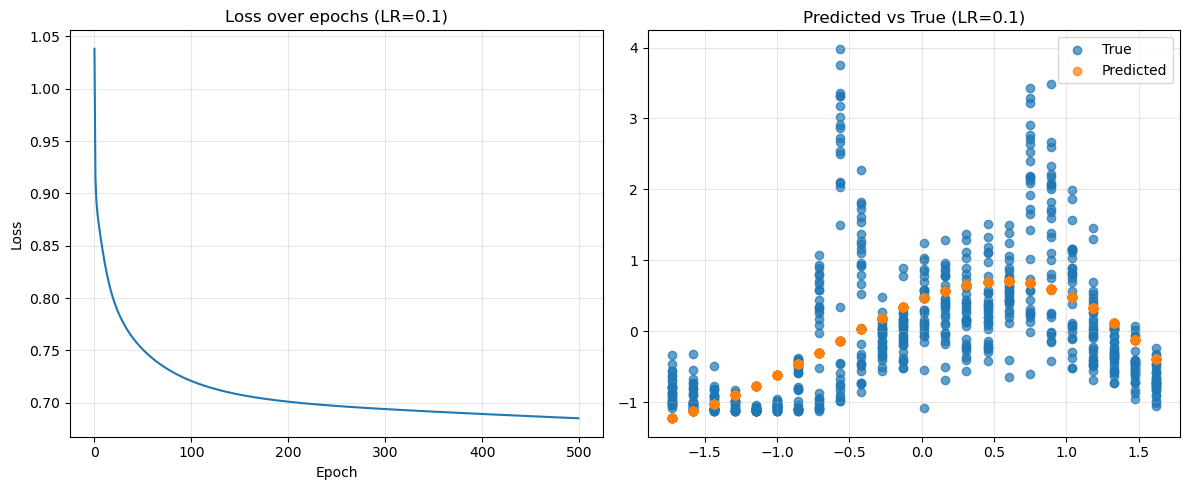

Final loss (LR=0.1): 0.685239

Training with learning rate: 0.5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


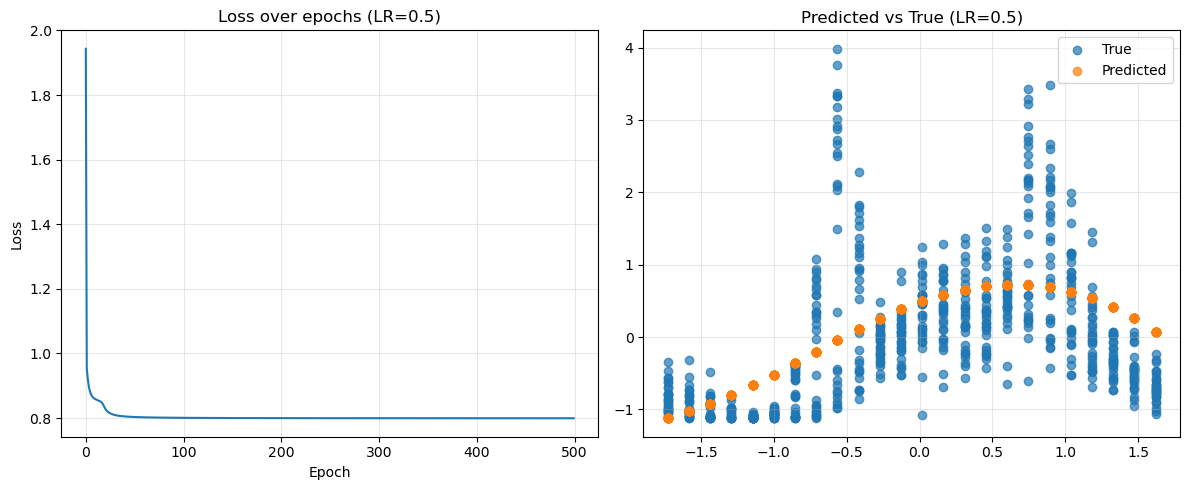

Final loss (LR=0.5): 0.799444


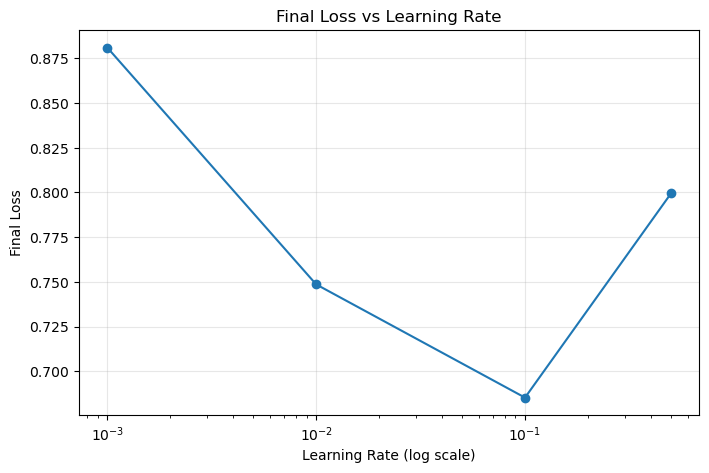



3. COMPARING ACTIVATION FUNCTIONS
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


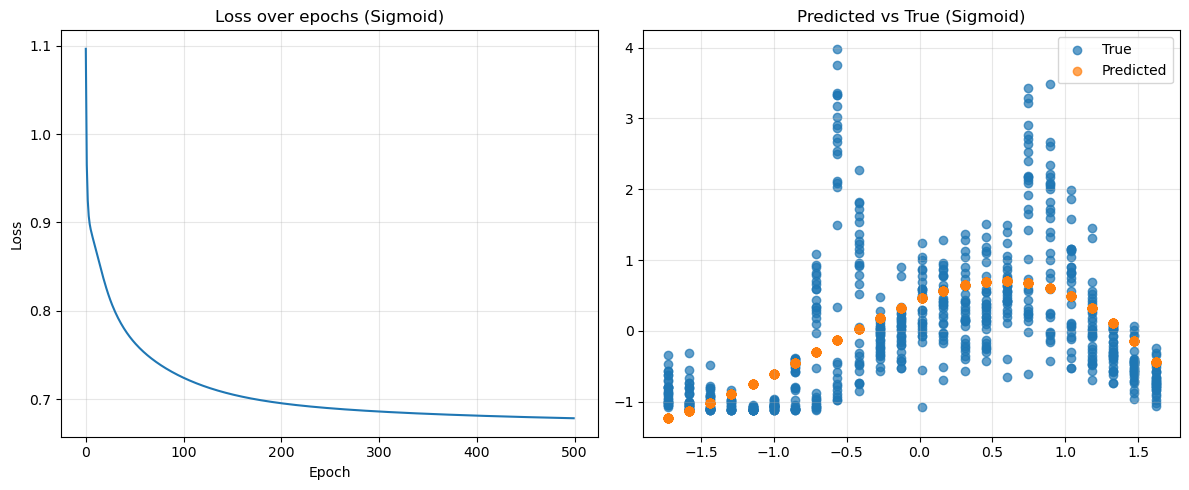

Final loss (Sigmoid): 0.678276
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


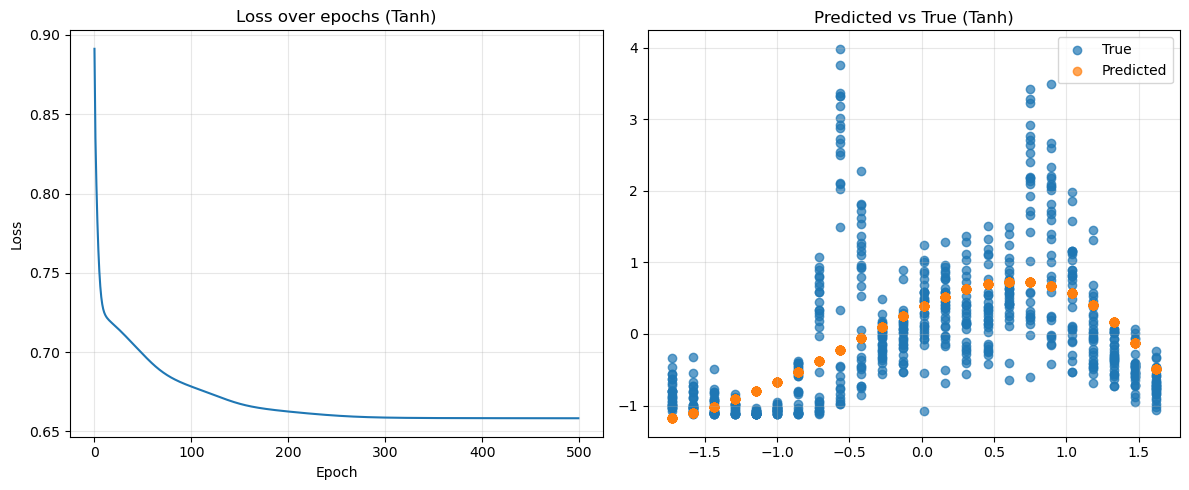

Final loss (Tanh): 0.658329


4. COMPARING L2 REGULARIZATION STRENGTHS

Training with L2 regularization: 0
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


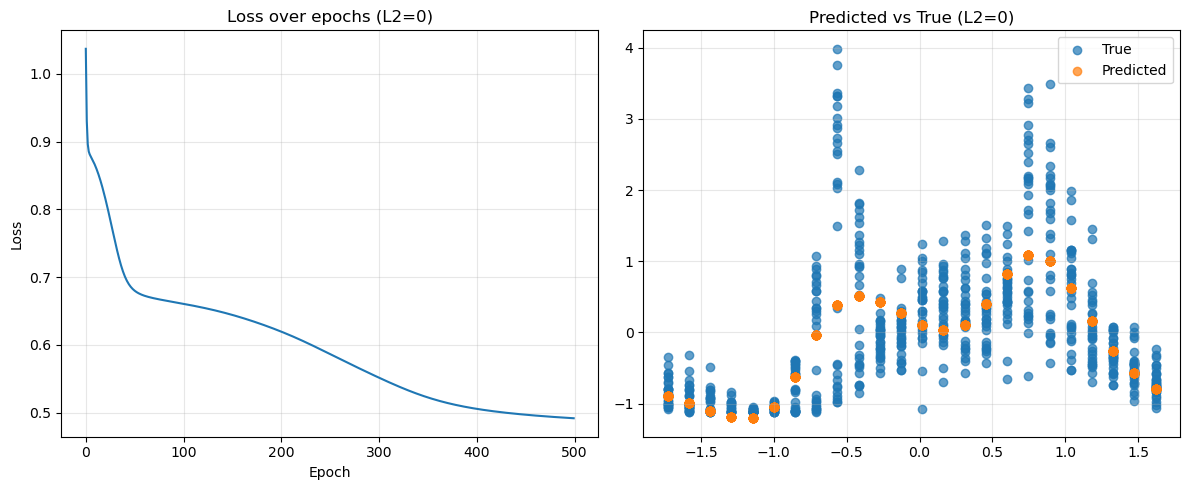

Final loss (L2=0): 0.491690

Training with L2 regularization: 0.001
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


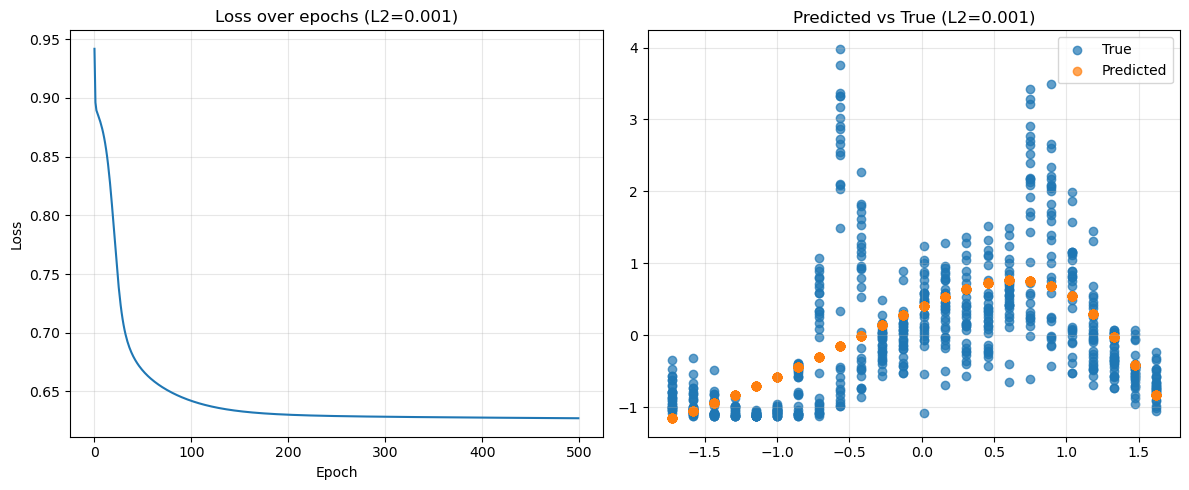

Final loss (L2=0.001): 0.627208

Training with L2 regularization: 0.01
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


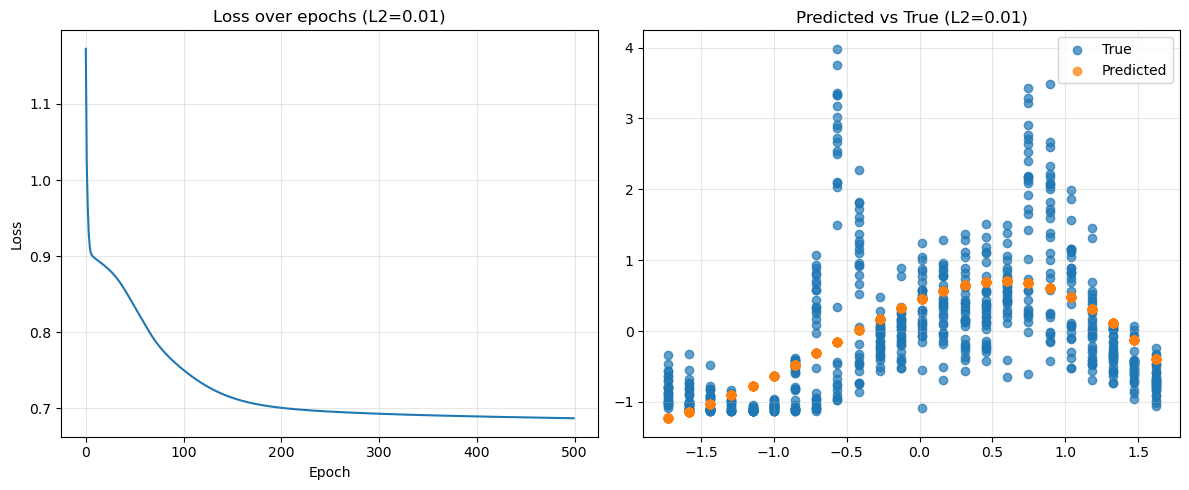

Final loss (L2=0.01): 0.687022

Training with L2 regularization: 0.1
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


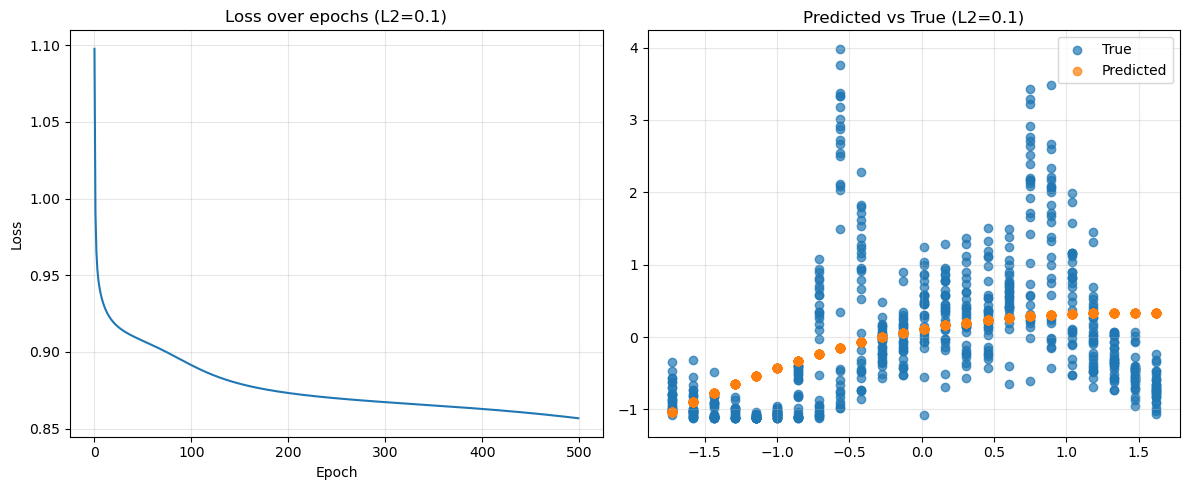

Final loss (L2=0.1): 0.856690

Training with L2 regularization: 1.0
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


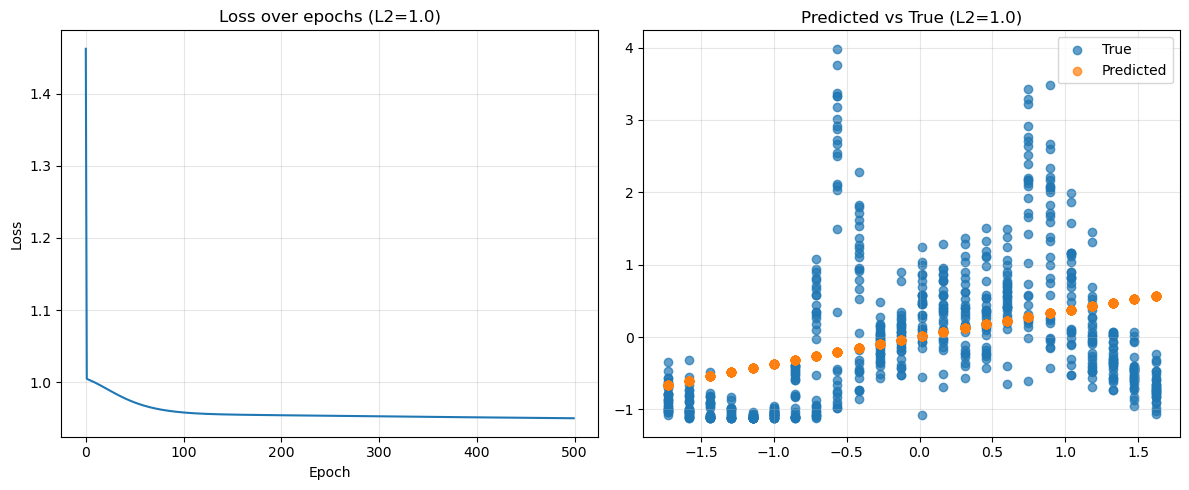

Final loss (L2=1.0): 0.950264


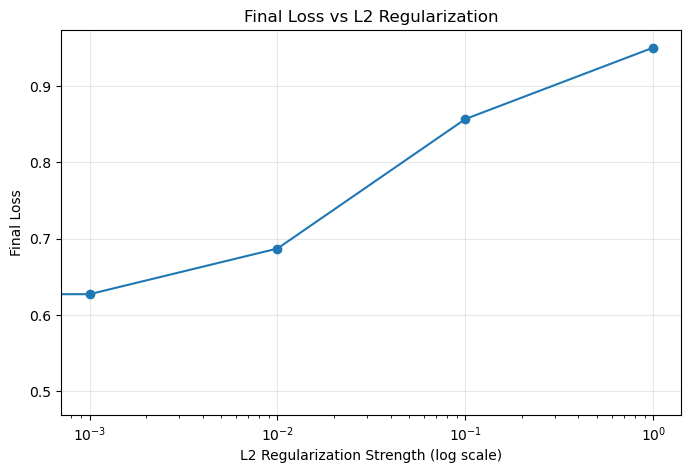



5. EXPLORING REGULARIZATION WITH VARYING NETWORK SIZE

Training with different unit counts WITHOUT regularization
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


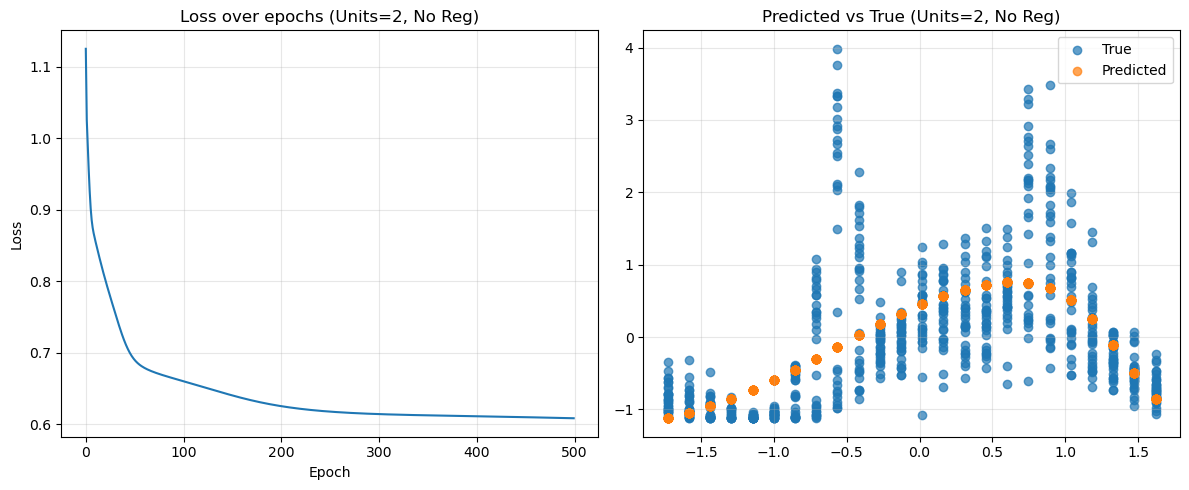

Final loss (Units=2, No Reg): 0.608613
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


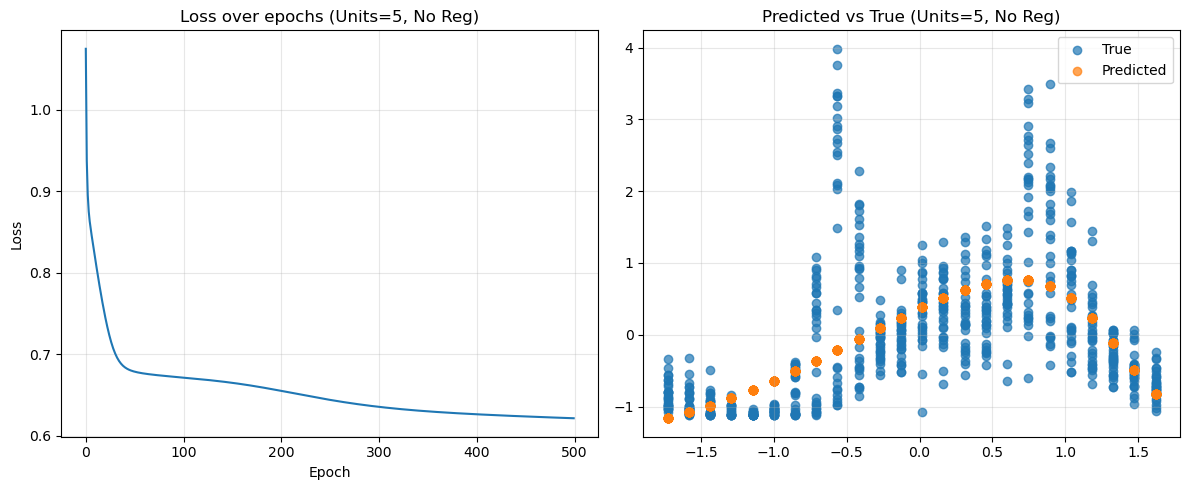

Final loss (Units=5, No Reg): 0.621433
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


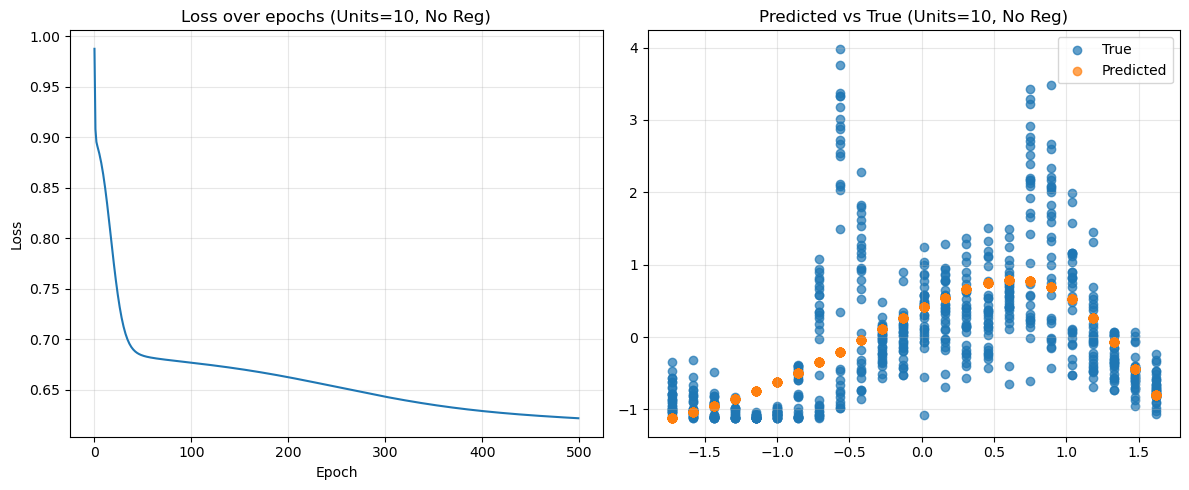

Final loss (Units=10, No Reg): 0.622020
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


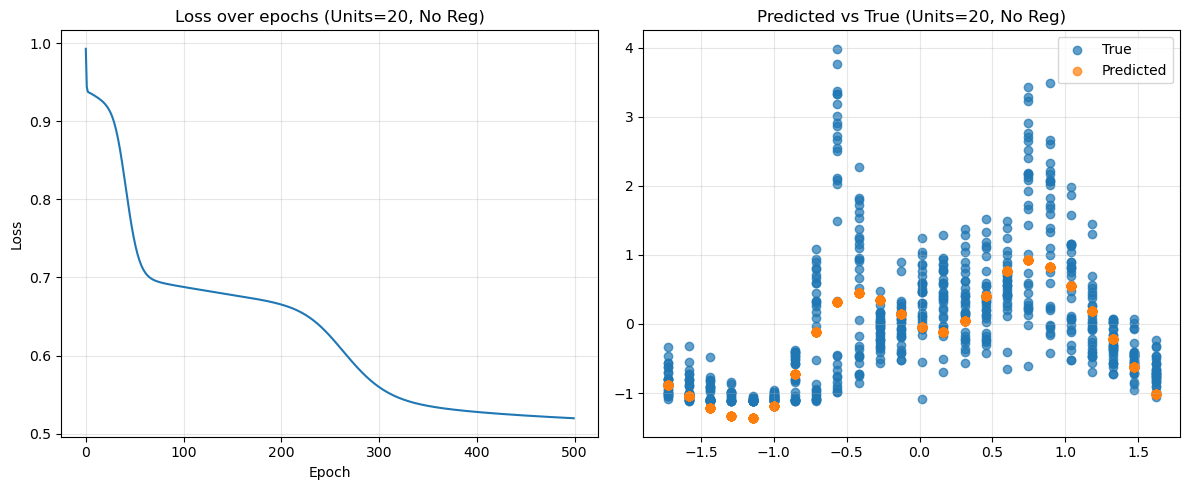

Final loss (Units=20, No Reg): 0.519871
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


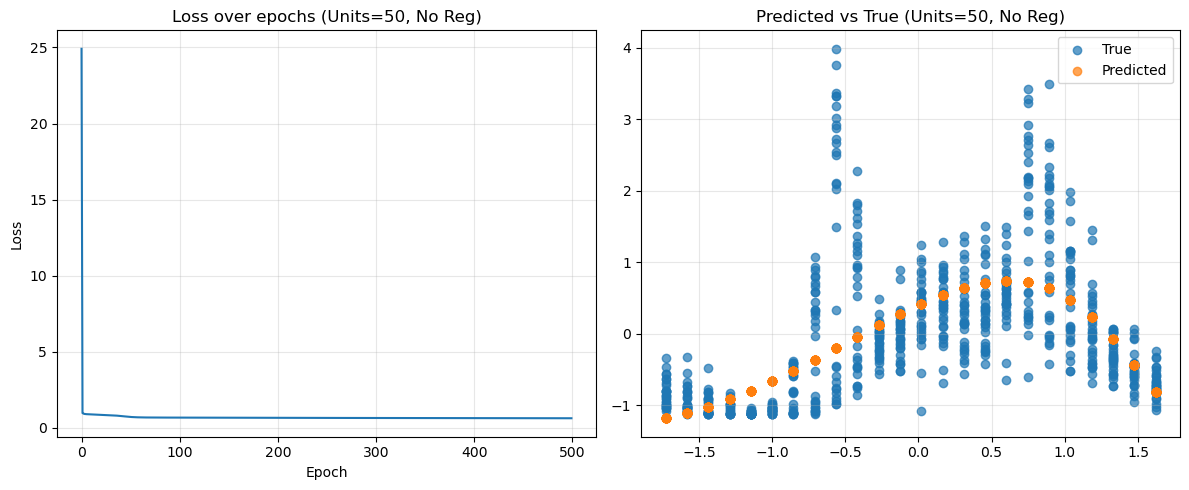

Final loss (Units=50, No Reg): 0.630812

Training with different unit counts WITH regularization
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


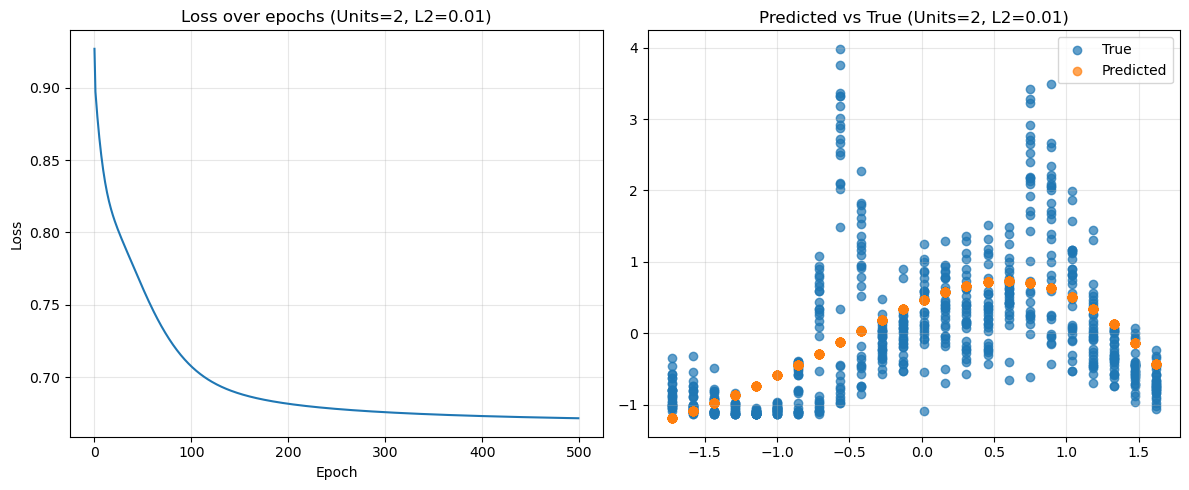

Final loss (Units=2, L2=0.01): 0.671543
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


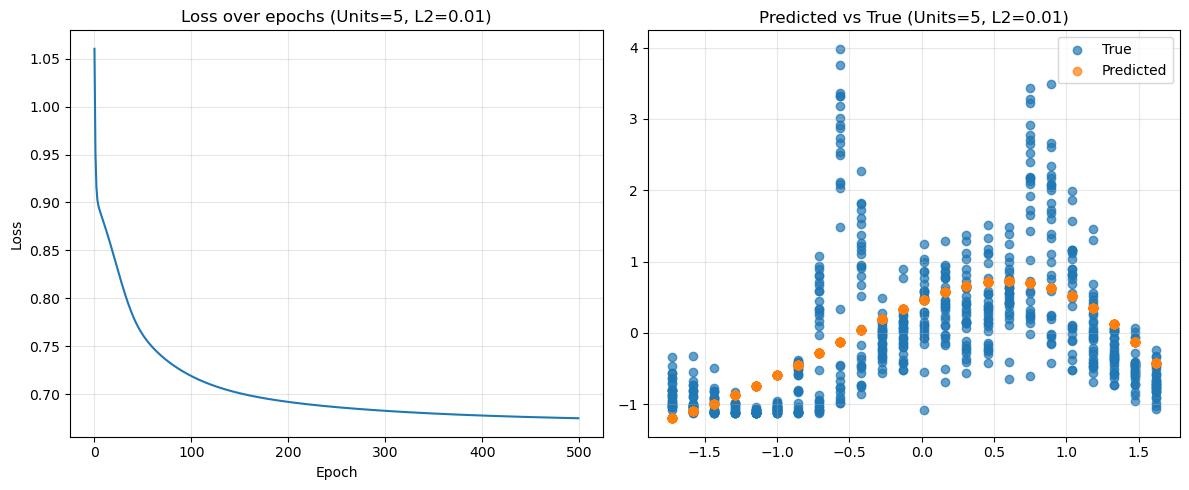

Final loss (Units=5, L2=0.01): 0.674981
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


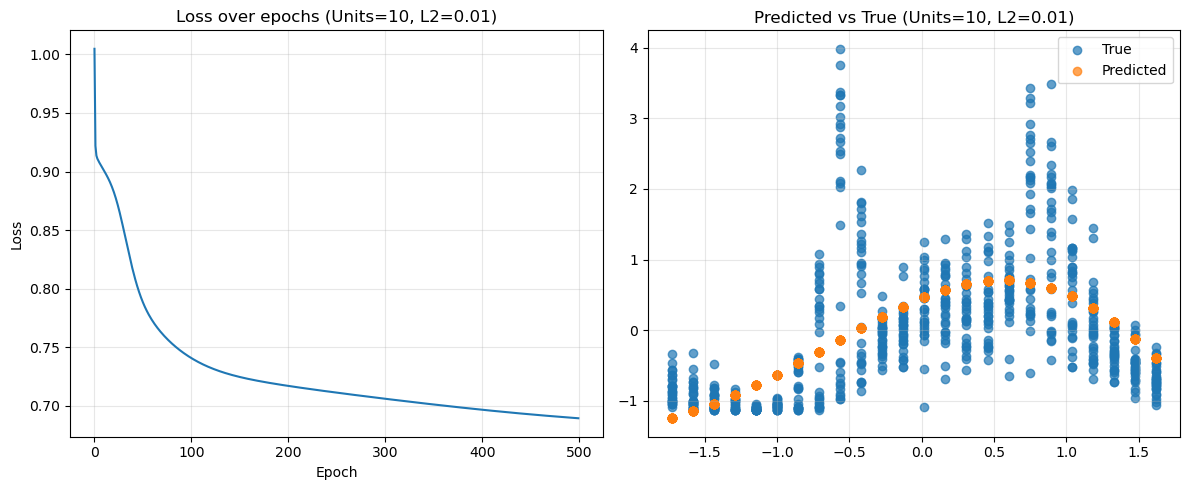

Final loss (Units=10, L2=0.01): 0.689519
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


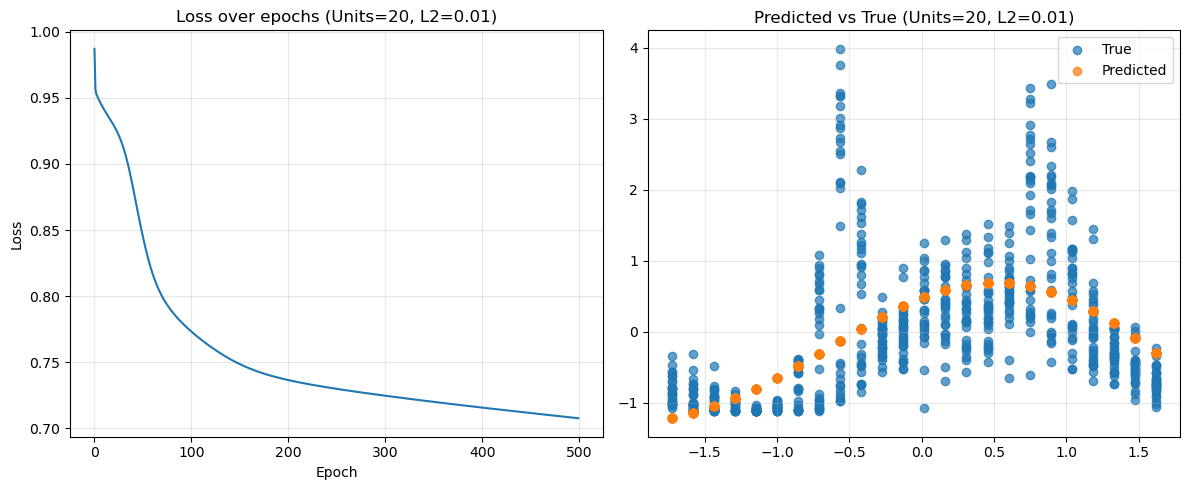

Final loss (Units=20, L2=0.01): 0.707645
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


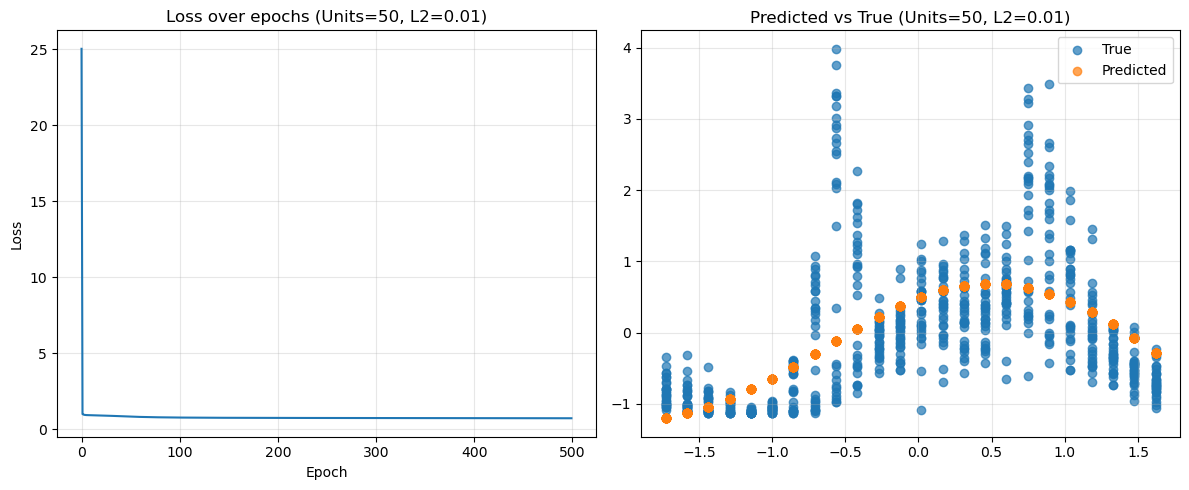

Final loss (Units=50, L2=0.01): 0.711471


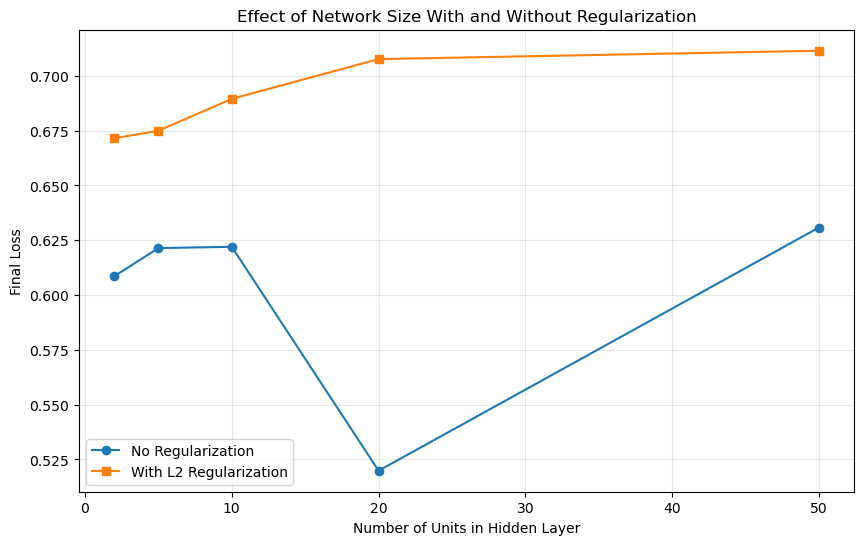



FINAL SUMMARY
Based on our experiments, we found:
1. SGD Type: Mini-batch SGD provides a good balance between stability and convergence speed
   - Batch GD final loss: 0.844711
   - Mini-batch GD final loss: 0.694933
   - SGD final loss: 0.676415
2. Best learning rate: 0.1 with loss: 0.685239
3. Activation functions comparison:
   - Sigmoid final loss: 0.678276
   - Tanh final loss: 0.658329
4. Best L2 regularization: 0 with loss: 0.491690
5. Effect of regularization with increasing network size:
   - Units: 2, No Reg Loss: 0.608613, With Reg Loss: 0.671543
   - Units: 5, No Reg Loss: 0.621433, With Reg Loss: 0.674981
   - Units: 10, No Reg Loss: 0.622020, With Reg Loss: 0.689519
   - Units: 20, No Reg Loss: 0.519871, With Reg Loss: 0.707645
   - Units: 50, No Reg Loss: 0.630812, With Reg Loss: 0.711471

Conclusion: The benefit of regularization does not clearly increase with network size.
The hypothesis that you can have 'too many' units without regularization needs more investigati

In [6]:
# install.packages("tensorflow")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import tensorflow as tf

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the CSV file
df = pd.read_csv('hour.csv')

# Display the first few rows and basic info
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Use the data for January (instances 1-688) as in the original code
df_subset = df[(df['instant'] >= 1) & (df['instant'] <= 688)]
print("\nJanuary subset shape:", df_subset.shape)

# Extract features and target
hr = df_subset['hr']
cnt = df_subset['cnt']

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(hr.values.reshape(-1, 1))
y = scaler_y.fit_transform(cnt.values.reshape(-1, 1))

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.title('Hourly Bike Rentals (Normalized)')
plt.xlabel('Hour of Day (Normalized)')
plt.ylabel('Number of Rentals (Normalized)')
plt.grid(True, alpha=0.3)
plt.show()

# Create function to build and train models with different configurations
def train_and_evaluate_model(activation='sigmoid', learning_rate=0.1, 
                            batch_size=32, epochs=1000, l2_lambda=0.01, 
                            units=5, sgd_type='mini-batch'):
    """
    Build, train and evaluate a neural network with the given parameters.
    
    Parameters:
    - activation: Activation function ('sigmoid' or 'tanh')
    - learning_rate: Learning rate for the optimizer
    - batch_size: Batch size for mini-batch SGD (set to 1 for pure SGD or len(X) for batch GD)
    - epochs: Number of training epochs
    - l2_lambda: L2 regularization parameter
    - units: Number of units in the hidden layer
    - sgd_type: Type of gradient descent ('sgd', 'mini-batch', or 'batch')
    
    Returns:
    - model: Trained model
    - history: Training history
    """
    
    # Adjust batch size based on SGD type
    if sgd_type == 'sgd':
        batch_size = 1
    elif sgd_type == 'batch':
        batch_size = len(X)
    
    # Build the model
    model = keras.Sequential([
        keras.Input(shape=(1,)),
        layers.Dense(units=units, activation=activation, 
                     kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(units=1)
    ])
    
    # Compile with SGD optimizer
    sgd_optimizer = keras.optimizers.SGD(
        learning_rate=learning_rate, nesterov=False
    )
    
    model.compile(
        optimizer=sgd_optimizer,
        loss='mse'
    )
    
    # Train the model
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    
    return model, history

# Function to plot results
def plot_results(model, history, title_suffix):
    """
    Plot the loss curve and predictions vs ground truth.
    
    Parameters:
    - model: Trained model
    - history: Training history
    - title_suffix: Suffix for plot titles
    """
    y_pred = model.predict(X)
    
    plt.figure(figsize=(12, 5))
    
    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.title(f"Loss over epochs {title_suffix}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True, alpha=0.3)
    
    # Prediction vs ground truth
    plt.subplot(1, 2, 2)
    plt.scatter(X, y, label='True', alpha=0.7)
    plt.scatter(X, y_pred, label='Predicted', alpha=0.7)
    plt.legend()
    plt.title(f"Predicted vs True {title_suffix}")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Return the final loss
    return history.history['loss'][-1]

# 1. Compare different types of gradient descent
print("\n\n1. COMPARING DIFFERENT TYPES OF GRADIENT DESCENT")
print("=" * 50)

# Batch Gradient Descent
model_bgd, history_bgd = train_and_evaluate_model(
    learning_rate=0.1, sgd_type='batch', epochs=500
)
loss_bgd = plot_results(model_bgd, history_bgd, "(Batch GD, LR=0.1)")
print(f"Final loss (Batch GD): {loss_bgd:.6f}")

# Mini-batch Gradient Descent (default)
model_mbgd, history_mbgd = train_and_evaluate_model(
    learning_rate=0.1, batch_size=32, epochs=500
)
loss_mbgd = plot_results(model_mbgd, history_mbgd, "(Mini-batch GD, LR=0.1, Batch=32)")
print(f"Final loss (Mini-batch GD): {loss_mbgd:.6f}")

# Stochastic Gradient Descent
model_sgd, history_sgd = train_and_evaluate_model(
    learning_rate=0.01, sgd_type='sgd', epochs=500
)
loss_sgd = plot_results(model_sgd, history_sgd, "(SGD, LR=0.01)")
print(f"Final loss (SGD): {loss_sgd:.6f}")

# 2. Compare different learning rates
print("\n\n2. COMPARING DIFFERENT LEARNING RATES")
print("=" * 50)

learning_rates = [0.001, 0.01, 0.1, 0.5]
final_losses = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model_lr, history_lr = train_and_evaluate_model(
        learning_rate=lr, batch_size=32, epochs=500
    )
    loss_lr = plot_results(model_lr, history_lr, f"(LR={lr})")
    final_losses.append(loss_lr)
    print(f"Final loss (LR={lr}): {loss_lr:.6f}")

# Plot final losses vs learning rates
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, final_losses, marker='o')
plt.xscale('log')
plt.title('Final Loss vs Learning Rate')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Final Loss')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Compare different activation functions
print("\n\n3. COMPARING ACTIVATION FUNCTIONS")
print("=" * 50)

# Sigmoid activation
model_sigmoid, history_sigmoid = train_and_evaluate_model(
    activation='sigmoid', learning_rate=0.1, epochs=500
)
loss_sigmoid = plot_results(model_sigmoid, history_sigmoid, "(Sigmoid)")
print(f"Final loss (Sigmoid): {loss_sigmoid:.6f}")

# Tanh activation
model_tanh, history_tanh = train_and_evaluate_model(
    activation='tanh', learning_rate=0.1, epochs=500
)
loss_tanh = plot_results(model_tanh, history_tanh, "(Tanh)")
print(f"Final loss (Tanh): {loss_tanh:.6f}")

# 4. Compare different L2 regularization strengths
print("\n\n4. COMPARING L2 REGULARIZATION STRENGTHS")
print("=" * 50)

l2_values = [0, 0.001, 0.01, 0.1, 1.0]
final_losses_l2 = []

for l2 in l2_values:
    print(f"\nTraining with L2 regularization: {l2}")
    model_l2, history_l2 = train_and_evaluate_model(
        l2_lambda=l2, epochs=500
    )
    loss_l2 = plot_results(model_l2, history_l2, f"(L2={l2})")
    final_losses_l2.append(loss_l2)
    print(f"Final loss (L2={l2}): {loss_l2:.6f}")

# Plot final losses vs L2 regularization
plt.figure(figsize=(8, 5))
plt.plot(l2_values, final_losses_l2, marker='o')
plt.xscale('log')
plt.title('Final Loss vs L2 Regularization')
plt.xlabel('L2 Regularization Strength (log scale)')
plt.ylabel('Final Loss')
plt.grid(True, alpha=0.3)
plt.show()

# 5. Exploring if regularization allows for more units
print("\n\n5. EXPLORING REGULARIZATION WITH VARYING NETWORK SIZE")
print("=" * 50)

# Different numbers of units
unit_counts = [2, 5, 10, 20, 50]

# Without regularization
print("\nTraining with different unit counts WITHOUT regularization")
final_losses_no_reg = []

for units in unit_counts:
    model_noreg, history_noreg = train_and_evaluate_model(
        units=units, l2_lambda=0, epochs=500
    )
    loss_noreg = plot_results(model_noreg, history_noreg, f"(Units={units}, No Reg)")
    final_losses_no_reg.append(loss_noreg)
    print(f"Final loss (Units={units}, No Reg): {loss_noreg:.6f}")

# With regularization
print("\nTraining with different unit counts WITH regularization")
final_losses_reg = []

for units in unit_counts:
    model_reg, history_reg = train_and_evaluate_model(
        units=units, l2_lambda=0.01, epochs=500
    )
    loss_reg = plot_results(model_reg, history_reg, f"(Units={units}, L2=0.01)")
    final_losses_reg.append(loss_reg)
    print(f"Final loss (Units={units}, L2=0.01): {loss_reg:.6f}")

# Compare the effect of units with and without regularization
plt.figure(figsize=(10, 6))
plt.plot(unit_counts, final_losses_no_reg, marker='o', label='No Regularization')
plt.plot(unit_counts, final_losses_reg, marker='s', label='With L2 Regularization')
plt.title('Effect of Network Size With and Without Regularization')
plt.xlabel('Number of Units in Hidden Layer')
plt.ylabel('Final Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Final summary
print("\n\nFINAL SUMMARY")
print("=" * 50)
print("Based on our experiments, we found:")
print("1. SGD Type: Mini-batch SGD provides a good balance between stability and convergence speed")
print(f"   - Batch GD final loss: {loss_bgd:.6f}")
print(f"   - Mini-batch GD final loss: {loss_mbgd:.6f}")
print(f"   - SGD final loss: {loss_sgd:.6f}")

# Find best learning rate
best_lr_idx = np.argmin(final_losses)
best_lr = learning_rates[best_lr_idx]
print(f"2. Best learning rate: {best_lr} with loss: {final_losses[best_lr_idx]:.6f}")

# Compare activation functions
print(f"3. Activation functions comparison:")
print(f"   - Sigmoid final loss: {loss_sigmoid:.6f}")
print(f"   - Tanh final loss: {loss_tanh:.6f}")

# Find best L2 regularization
best_l2_idx = np.argmin(final_losses_l2)
best_l2 = l2_values[best_l2_idx]
print(f"4. Best L2 regularization: {best_l2} with loss: {final_losses_l2[best_l2_idx]:.6f}")

# Compare regularization with unit counts
print("5. Effect of regularization with increasing network size:")
for i, units in enumerate(unit_counts):
    print(f"   - Units: {units}, No Reg Loss: {final_losses_no_reg[i]:.6f}, With Reg Loss: {final_losses_reg[i]:.6f}")

# Check if the gap between regularized and non-regularized increases with more units
if final_losses_no_reg[-1] - final_losses_reg[-1] > final_losses_no_reg[0] - final_losses_reg[0]:
    print("\nConclusion: The benefit of regularization increases as the network size grows.")
    print("This supports the hypothesis that you can have 'too many' units if you don't regularize.")
else:
    print("\nConclusion: The benefit of regularization does not clearly increase with network size.")
    print("The hypothesis that you can have 'too many' units without regularization needs more investigation.")